In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [48]:
# Read the dataset
dataset = pd.read_csv(r'traffic volume.csv')

In [49]:
# Read the dataset
dataset.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [50]:
# Drop rows with missing values
dataset.dropna(inplace=True)

# Handle non-numeric values
non_numeric_cols = dataset.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

                 holiday      temp      rain      snow   weather      date  \
holiday         1.000000 -0.000477  0.000066  0.000433 -0.004314  0.007363   
temp           -0.000477  1.000000  0.009075 -0.019755 -0.033397  0.029951   
rain            0.000066  0.009075  1.000000 -0.000090  0.009540 -0.002249   
snow            0.000433 -0.019755 -0.000090  1.000000  0.036655  0.016492   
weather        -0.004314 -0.033397  0.009540  0.036655  1.000000  0.023708   
date            0.007363  0.029951 -0.002249  0.016492  0.023708  1.000000   
Time            0.026068  0.111858  0.003425  0.009861 -0.053555 -0.009112   
traffic_volume  0.018695  0.130171  0.004722  0.000742 -0.039901 -0.007722   

                    Time  traffic_volume  
holiday         0.026068        0.018695  
temp            0.111858        0.130171  
rain            0.003425        0.004722  
snow            0.009861        0.000742  
weather        -0.053555       -0.039901  
date           -0.009112       -0.00772

<Axes: >

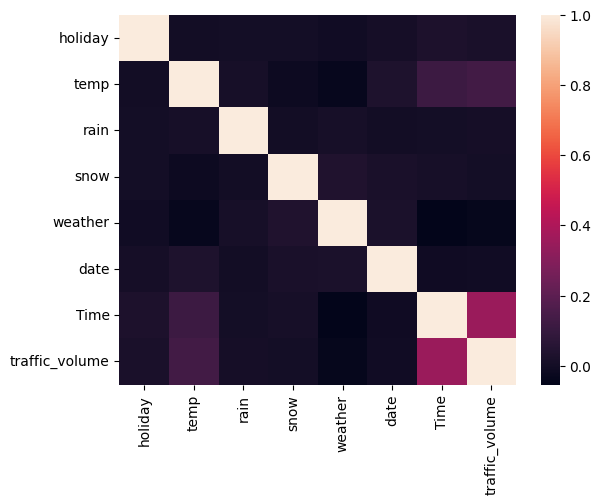

In [51]:
# Replace 'dataset' with the actual variable name representing your DataFrame
correlation_matrix = dataset.corr(numeric_only=True)
print(correlation_matrix)

import seaborn as sns
sns.heatmap(correlation_matrix)

In [52]:
# Descriptive Statistics
dataset.describe()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
count,48090.000000,48090.000000,48090.000000,48090.000000,48090.000000,48090.000000,48090.000000,48090.000000
mean,6.997775,281.201594,0.335056,0.000223,2.579455,930.235912,11.397858,3259.282616
std,0.140165,13.348507,44.842187,0.008177,2.785358,534.563071,6.940880,1986.770842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,272.150000,0.000000,0.000000,0.000000,467.000000,5.000000,1192.000000
50%,7.000000,282.460000,0.000000,0.000000,1.000000,934.000000,11.000000,3378.500000
75%,7.000000,291.810000,0.000000,0.000000,5.000000,1394.000000,17.000000,4933.000000
max,11.000000,310.070000,9831.300000,0.510000,10.000000,1859.000000,23.000000,7280.000000


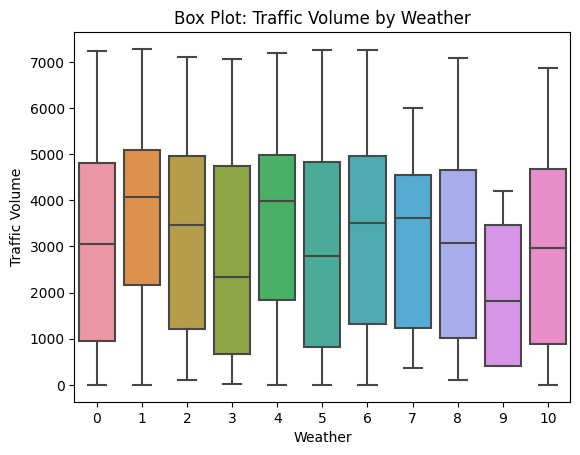

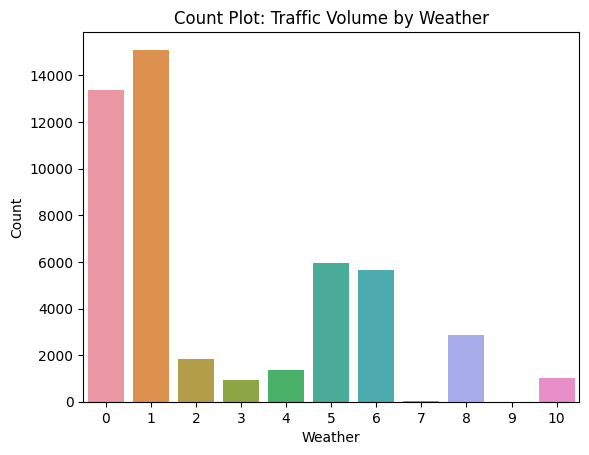

In [53]:
# Univarient Analysis

import seaborn as sns

sns.boxplot(x='weather', y='traffic_volume', data=dataset)
plt.xlabel('Weather')
plt.ylabel('Traffic Volume')
plt.title('Box Plot: Traffic Volume by Weather')
plt.show()

print("  ")
sns.countplot(x='weather', data=dataset)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count Plot: Traffic Volume by Weather')
plt.show()


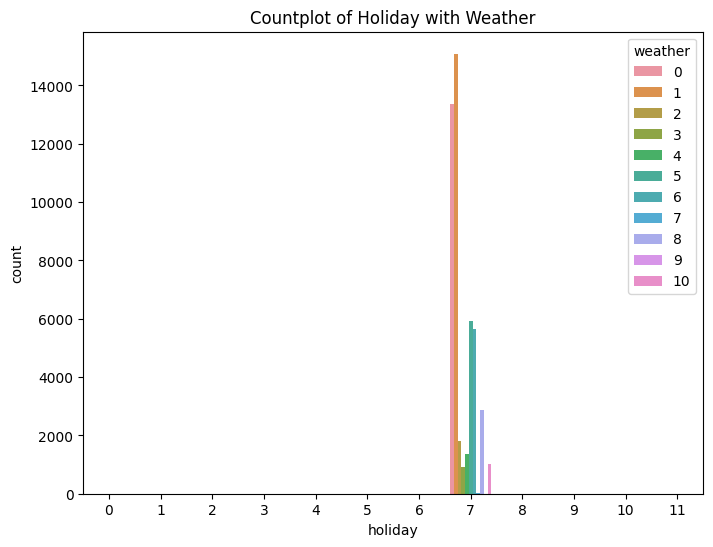

In [54]:
# Bi Varient Analysis
# Plot countplot with two categorical features
plt.figure(figsize=(8, 6))
sns.countplot(x='holiday', hue='weather', data=dataset)
plt.title('Countplot of Holiday with Weather')
plt.show()
data = dataset

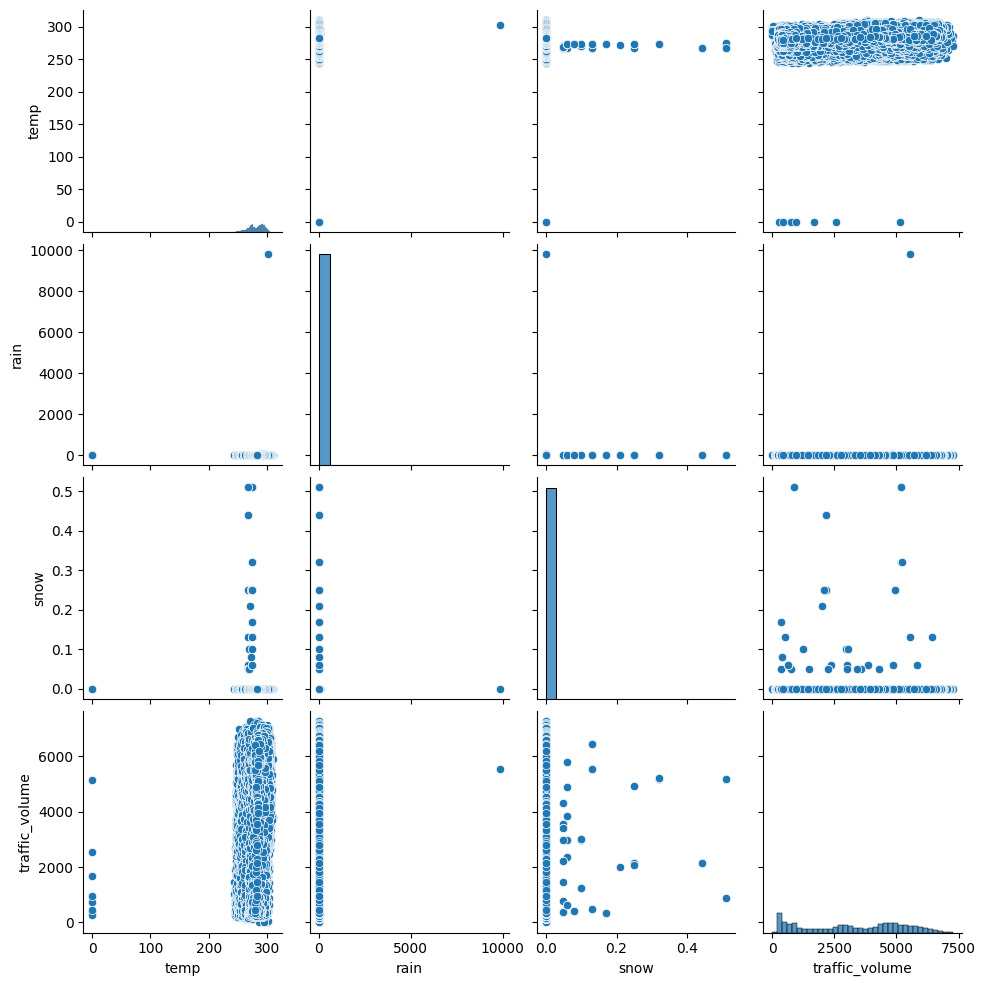

In [55]:
#Multivarient Analysis

sns.pairplot(data[['temp', 'rain', 'snow', 'traffic_volume']])
plt.show()

In [56]:
# Split the dataset into independent variables (X) and target variable (y)
X = dataset.drop('traffic_volume', axis=1)
y = dataset['traffic_volume']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Training Multiple Algorithm
# Initialize the models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svm_reg = SVR()
xgboost_reg = xgb.XGBRegressor()

# Fit the models with the training data
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)
xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
# Predict the models
linear_train_preds = linear_reg.predict(X_train)
tree_train_preds = decision_tree_reg.predict(X_train)
rf_train_preds = random_forest_reg.predict(X_train)
svm_train_preds = svm_reg.predict(X_train)
xgb_train_preds = xgboost_reg.predict(X_train)

# Calculate score of the model
linear_train_accuracy = linear_reg.score(X_train, y_train)
tree_train_accuracy = decision_tree_reg.score(X_train, y_train)
rf_train_accuracy = random_forest_reg.score(X_train, y_train)
svm_train_accuracy = svm_reg.score(X_train, y_train)
xgb_train_accuracy = xgboost_reg.score(X_train, y_train)

In [59]:
print("Linear Regression:")
print("Train Predictions:", linear_train_preds)
print("Train Accuracy:", linear_train_accuracy)

print("Decision Tree Regression:")
print("Train Predictions:", tree_train_preds)
print("Train Accuracy:", tree_train_accuracy)

print("Random Forest Regression:")
print("Train Predictions:", rf_train_preds)
print("Train Accuracy:", rf_train_accuracy)

print("Support Vector Regression:")
print("Train Predictions:", svm_train_preds)
print("Train Accuracy:", svm_train_accuracy)

print("XGBoost Regression:")
print("Train Predictions:", xgb_train_preds)
print("Train Accuracy:", xgb_train_accuracy)

Linear Regression:
Train Predictions: [3643.70655661 3701.32488681 3789.99369604 ... 4351.96572301 4074.80328205
 3679.54314344]
Train Accuracy: 0.1345877208406996
Decision Tree Regression:
Train Predictions: [5071. 3121.  881. ... 2431. 2450. 5240.]
Train Accuracy: 1.0
Random Forest Regression:
Train Predictions: [4888.16 3043.27 1611.68 ... 2519.85 2572.01 5042.01]
Train Accuracy: 0.9759332264967822
Support Vector Regression:
Train Predictions: [3357.06514359 3353.08189477 3404.25007595 ... 3373.65225886 3388.94808827
 3379.60156875]
Train Accuracy: -0.0030262644149452456
XGBoost Regression:
Train Predictions: [5114.7637 3259.1384  864.1574 ... 2226.8643 2688.0864 4861.3594]
Train Accuracy: 0.8733558569198925


In [60]:
# Testing the model
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_reg_pred = decision_tree_reg.predict(X_test)
random_forest_reg_pred = random_forest_reg.predict(X_test)
svm_reg_pred = svm_reg.predict(X_test)
xgboost_reg_pred = xgboost_reg.predict(X_test)

# Print the predictions for evaluation
print("Linear Regression predictions:", linear_reg_pred)
print("Decision Tree Regression predictions:", decision_tree_reg_pred)
print("Random Forest Regression predictions:", random_forest_reg_pred)
print("SVM Regression predictions:", svm_reg_pred)
print("XGBoost Regression predictions:", xgboost_reg_pred)


Linear Regression predictions: [3714.58400879 3530.65663855 2590.01543428 ... 3275.77794768 2863.06299723
 4197.52983039]
Decision Tree Regression predictions: [3905. 4818. 1329. ... 3585. 5628. 4535.]
Random Forest Regression predictions: [5390.71 4972.4  3654.22 ... 3367.31 4679.6  4531.49]
SVM Regression predictions: [3353.24132399 3376.91876152 3400.78752422 ... 3361.2967494  3401.96202928
 3344.27025553]
XGBoost Regression predictions: [5564.6655 5085.719  4203.0654 ... 3224.3257 4817.616  4384.315 ]


In [61]:
from sklearn.metrics import r2_score

# Calculate R2 score for each model
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
decision_tree_reg_r2 = r2_score(y_test, decision_tree_reg_pred)
random_forest_reg_r2 = r2_score(y_test, random_forest_reg_pred)
svm_reg_r2 = r2_score(y_test, svm_reg_pred)
xgboost_reg_r2 = r2_score(y_test, xgboost_reg_pred)

# Print the R2 scores
print("Linear Regression R2 score:", linear_reg_r2)
print("Decision Tree Regression R2 score:", decision_tree_reg_r2)
print("Random Forest Regression R2 score:", random_forest_reg_r2)
print("SVM Regression R2 score:", svm_reg_r2)
print("XGBoost Regression R2 score:", xgboost_reg_r2)


Linear Regression R2 score: -7.39165043530633
Decision Tree Regression R2 score: 0.6915727763474268
Random Forest Regression R2 score: 0.8284441378757534
SVM Regression R2 score: -0.0036978879884987936
XGBoost Regression R2 score: 0.8499653143971955


In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSD for each model
linear_reg_rmsd = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
decision_tree_reg_rmsd = np.sqrt(mean_squared_error(y_test, decision_tree_reg_pred))
random_forest_reg_rmsd = np.sqrt(mean_squared_error(y_test, random_forest_reg_pred))
svm_reg_rmsd = np.sqrt(mean_squared_error(y_test, svm_reg_pred))
xgboost_reg_rmsd = np.sqrt(mean_squared_error(y_test, xgboost_reg_pred))

# Print the RMSD values
print("Linear Regression RMSD:", linear_reg_rmsd)
print("Decision Tree Regression RMSD:", decision_tree_reg_rmsd)
print("Random Forest Regression RMSD:", random_forest_reg_rmsd)
print("SVM Regression RMSD:", svm_reg_rmsd)
print("XGBoost Regression RMSD:", xgboost_reg_rmsd)


Linear Regression RMSD: 5773.9048538095085
Decision Tree Regression RMSD: 1106.9354166975809
Random Forest Regression RMSD: 825.5601325316534
SVM Regression RMSD: 1996.8591650163125
XGBoost Regression RMSD: 772.0434931498636


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for each model
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_pred)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_pred)
svm_reg_mae = mean_absolute_error(y_test, svm_reg_pred)
xgboost_reg_mae = mean_absolute_error(y_test, xgboost_reg_pred)

# Print the MAE values
print("Linear Regression MAE:", linear_reg_mae)
print("Decision Tree Regression MAE:", decision_tree_reg_mae)
print("Random Forest Regression MAE:", random_forest_reg_mae)
print("SVM Regression MAE:", svm_reg_mae)
print("XGBoost Regression MAE:", xgboost_reg_mae)

Linear Regression MAE: 1706.5357037185265
Decision Tree Regression MAE: 590.6403618215845
Random Forest Regression MAE: 527.3687419421918
SVM Regression MAE: 1751.3867140826203
XGBoost Regression MAE: 518.2740615965807


In [65]:
# Calculate MSE for each model
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_pred)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_pred)
svm_reg_mse = mean_squared_error(y_test, svm_reg_pred)
xgboost_reg_mse = mean_squared_error(y_test, xgboost_reg_pred)

# Print the MSE values
print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree Regression MSE:", decision_tree_reg_mse)
print("Random Forest Regression MSE:", random_forest_reg_mse)
print("SVM Regression MSE:", svm_reg_mse)
print("XGBoost Regression MSE:", xgboost_reg_mse)

Linear Regression MSE: 33337977.260845006
Decision Tree Regression MSE: 1225306.016739447
Random Forest Regression MSE: 681549.532425681
SVM Regression MSE: 3987446.524909645
XGBoost Regression MSE: 596051.1553150435


In [63]:
# Building the model
import pickle

# Assuming linear regression is the best model based on evaluation metrics
best_model = random_forest_reg

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
